In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Warnings
import warnings
warnings.filterwarnings('ignore')


import os
print(os.listdir('../Titanic/digit-recognizer'))

['sample_submission.csv', 'test.csv', 'train.csv']


# Loading Train and Test data

In [3]:
train = pd.read_csv('../Titanic/digit-recognizer/train.csv')
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test = pd.read_csv('../Titanic/digit-recognizer/test.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Droping the label column from train data

In [5]:
X_train = train.drop('label', axis=1)

y_train = train['label']

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

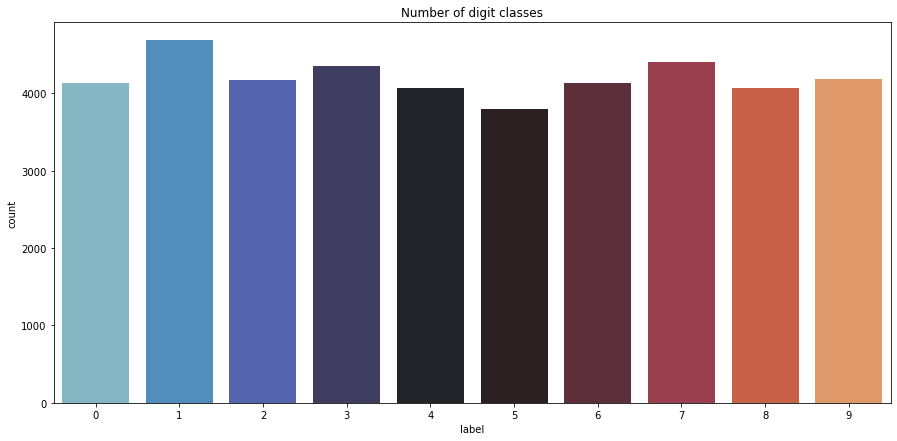

In [6]:
plt.figure(figsize=(15,7))
g = sns.countplot(y_train, palette='icefire')
plt.title('Number of digit classes')
y_train.value_counts()

# lets plot some images

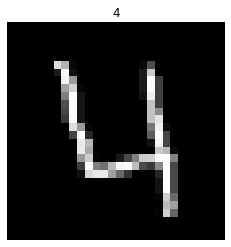

In [7]:
img = np.array(X_train.iloc[3])
img = img.reshape((28,28))

plt.imshow(img, cmap='gray')
plt.title(train.iloc[3,0])
plt.axis('off')
plt.show()

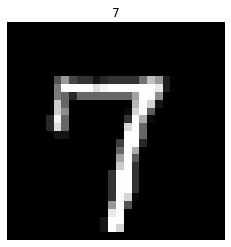

In [8]:
img = np.array(X_train.iloc[6])
img = img.reshape((28,28))

plt.imshow(img, cmap='gray')
plt.title(train.iloc[6,0])
plt.axis('off')
plt.show()

<a id="2"></a>
## Normalization, Reshape and Label Encoding 
* Normalization
    * We perform a grayscale normalization to reduce the effect of illumination's differences.
    * If we perform normalization, CNN works faster.
* Reshape
    * Train and test images (28 x 28) 
    * We reshape all data to 28x28x1 3D matrices.
    * Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel. 
* Label Encoding  
    * Encode labels to one hot vectors 
        * 2 => [0,0,1,0,0,0,0,0,0,0]
        * 4 => [0,0,0,0,1,0,0,0,0,0]

## Normalize the data

In [9]:
X_train = X_train / 255.0
test = test / 255.0

print('X_train shape : ', X_train.shape)
print('Test shape : ', test.shape)


X_train shape :  (42000, 784)
Test shape :  (28000, 784)


## Reshape

In [10]:
X_train = X_train.values.reshape(-1, 28,28, 1)

test = test.values.reshape(-1, 28,28,1)

print('X_train shape: ', X_train.shape)
print('test shape : ', test.shape)

X_train shape:  (42000, 28, 28, 1)
test shape :  (28000, 28, 28, 1)


## Label Encoding


In [11]:

from keras.utils.np_utils import to_categorical # Convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 10)

## split the data into train and test sets

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,
                                                 random_state=42)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_val.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape : ' , y_val.shape)


X_train shape:  (37800, 28, 28, 1)
X_test shape:  (4200, 28, 28, 1)
y_train shape:  (37800, 10)
y_test shape :  (4200, 10)


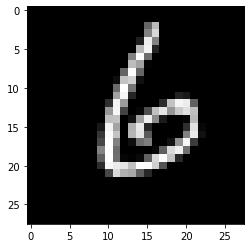

In [13]:
# Som Examples

plt.imshow(X_train[2][:,:,0], cmap='gray')
plt.show()

<a id="4"></a>
## Convolutional Neural Network 
* CNN is used for image classification, object detection 
* <a href="https://ibb.co/kV1j9p"><img src="https://preview.ibb.co/nRkBpp/gec2.jpg" alt="gec2" border="0"></a>

<a id="5"></a>
### What is Convolution Operation?
* We have some image and feature detector(3*3)
* Feature detector does not need to be 3 by 3 matrix. It can be 5 by 5 or 7 by 7.
* Feature detector = kernel = filter
* Feauture detector detects features like edges or convex shapes. Example, if out input is dog, feature detector can detect features like ear or tail of the dog.
* feature map = conv(input image, feature detector). Element wise multiplication of matrices.
* feature map = convolved feature
* Stride = navigating in input image.
* We reduce the size of image. This is important bc code runs faster. However, we lost information. 
* We create multiple feature maps bc we use multiple feature detectors(filters).
* Lets look at gimp. Edge detect: [0,10,0],[10,-4,10],[0,10,0]
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/m4FQC9/gec.jpg" alt="gec" border="0"></a>
* After having convolution layer we use ReLU to break up linearity. Increase nonlinearity. Because images are non linear.
* <a href="https://ibb.co/mVZih9"><img src="https://preview.ibb.co/gbcQvU/RELU.jpg" alt="RELU" border="0"></a>

<a id="6"></a>
### Same Padding
* As we keep applying conv layers, the size of the volume will decrease faster than we would like. In the early layers of our network, we want to preserve as much information about the original input volume so that we can extract those low level features.
* input size and output size are same.
* <a href="https://ibb.co/jUPkUp"><img src="https://preview.ibb.co/noH5Up/padding.jpg" alt="padding" border="0"></a>

<a id="7"></a>
### Max Pooling
* It makes down-sampling or sub-sampling (Reduces the number of parameters)
* It makes the detection of features invariant to scale or orientation changes.
* It reduce the amount of parameters and computation in the network, and hence to also control overfitting. 
* <a href="https://ibb.co/ckTjN9"><img src="https://preview.ibb.co/gsNYFU/maxpool.jpg" alt="maxpool" border="0"></a>

<a id="8"></a>
### Flattening
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/c7eVvU/flattenigng.jpg" alt="flattenigng" border="0"></a>

<a id="9"></a>
### Full Connection
* Neurons in a fully connected layer have connections to all activations in the previous layer
* Artificial Neural Network
* <a href="https://ibb.co/hsS14p"><img src="https://preview.ibb.co/evzsAU/fullyc.jpg" alt="fullyc" border="0"></a>

<a id="10"></a>
## Implementing with Keras

<a id="11"></a>
### Create Model
* conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)
* Dropout: Dropout is a technique where randomly selected neurons are ignored during training
* <a href="https://ibb.co/jGcvVU"><img src="https://preview.ibb.co/e7yPPp/dropout.jpg" alt="dropout" border="0"></a>

In [14]:
from  sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

## Adding hidden layer
model.add(Conv2D(filters = 8, kernel_size=(5,5), padding='Same', activation='relu',
                input_shape = (28,28,1)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', 
                 activation = 'relu'))
# Fully Connected

model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

## Optemizer
* Adam optimizer: Change the learning rate

In [20]:
## Define the optimizer
optimizer = Adam(lr=0.002, beta_1=0.8, beta_2=0.9)

## Compile the Model

* categorical crossentropy
* we make binary cross entropy at previous parts and in machine learning tutorials
* At this time we use categorical crosstenropy. That means that we have multi class.

In [21]:
# Compile the model
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', 
             metrics=['accuracy'])

## Epochs and Batch Size

* Say you have a dataset of 10 examples (or samples). you have a batch size of 2, and you've specified you want the algorithm to run for 3 epochs. Therefore, in each epoch,you have 5 batches (10/2 = 5). Each batch gets passed through the algoithm, therefore you have 5 iterations per each.



In [22]:
epochs = 10 # for better resu;t increase the epochs 
batch_size = 150

### Data Augmentation

* To avoid overfitting problem. we need to expend artificially our handwritten digit dataset
* after the training data with small transformations to reproduce the variations of digit.
* for examples, the number is not centered the scale is not the same ( some who write with big/small numbers) the image is rotated.
* <a href="https://ibb.co/k24CUp"><img src="https://preview.ibb.co/nMxXUp/augment.jpg" alt="augment" border="0"></a>

In [23]:
# data Augmentation

datagen = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
                            samplewise_center=False, # Set each sample mean to 0
                            featurewise_std_normalization=False, # divide inputs by std of the dataset
                            samplewise_std_normalization=False, # divide each input by its std
                            zca_whitening=False, # dimension reduction
                            rotation_range=5, # randomly rotate images horizontally 10%
                            zoom_range=0.1, # Randomly zoom image 10%
                            width_shift_range=0.1, # randomly shift images horizontally 10%
                            height_shift_range=0.1, # randomly shift images vertically 10%
                            horizontal_flip=False, # randomly flip images
                            vertical_flip=False) # randomly flip images

datagen.fit(X_train)


In [24]:
### Fit the model

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                             epochs = epochs, validation_data=(X_val, y_val),
                             steps_per_epoch = X_train.shape[0] // batch_size)

Epoch 1/10
252/252 [==============================] - 13s 50ms/step - loss: 0.0928 - accuracy: 0.9729 - val_loss: 0.0458 - val_accuracy: 0.9888
Epoch 2/10
252/252 [==============================] - 12s 49ms/step - loss: 0.0964 - accuracy: 0.9716 - val_loss: 0.0430 - val_accuracy: 0.9886
Epoch 3/10
252/252 [==============================] - 12s 49ms/step - loss: 0.0886 - accuracy: 0.9746 - val_loss: 0.0450 - val_accuracy: 0.9879
Epoch 4/10
252/252 [==============================] - 12s 49ms/step - loss: 0.0883 - accuracy: 0.9733 - val_loss: 0.0540 - val_accuracy: 0.9874
Epoch 5/10
252/252 [==============================] - 12s 49ms/step - loss: 0.0950 - accuracy: 0.9732 - val_loss: 0.0437 - val_accuracy: 0.9893
Epoch 6/10
252/252 [==============================] - 12s 49ms/step - loss: 0.0885 - accuracy: 0.9746 - val_loss: 0.0495 - val_accuracy: 0.9879
Epoch 7/10
252/252 [==============================] - 12s 49ms/step - loss: 0.0817 - accuracy: 0.9764 - val_loss: 0.0537 - val_accuracy:

## Evaluate the model
* Test Loss Visualization
* Confusion Matrix


**Plotting the loss and accuracy curves for training and visualization**

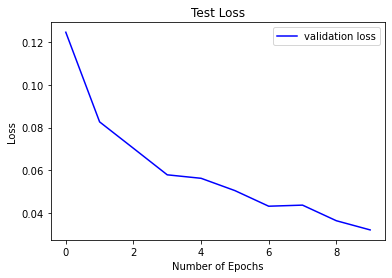

In [19]:
plt.plot(history.history['val_loss'], color='b', label='validation loss')
plt.title('Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

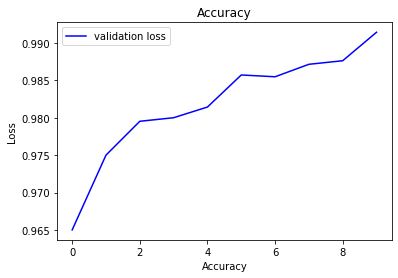

In [20]:
plt.plot(history.history['val_accuracy'], color='b', label='validation loss')
plt.title('Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Confusion Matrix

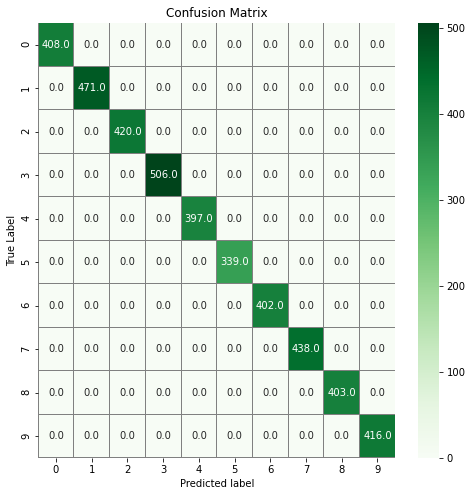

In [21]:
import seaborn as sns

## Predict the values from the validation dataset
y_pred = model.predict(X_val)

## Convert predictions classes to one hot vectors
y_pred_class = np.argmax(y_val, axis=1)

# Convert validation observations to one hot vectors
y_true = np.argmax(y_val, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_class)

# Plot the confusion matrix
f, ax = plt.subplots(figsize=(8,8))

sns.heatmap(confusion_mtx, annot=True, linewidths = 0.01, cmap='Greens', linecolor='gray', fmt='.1f', ax=ax)

plt.xlabel('Predicted label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

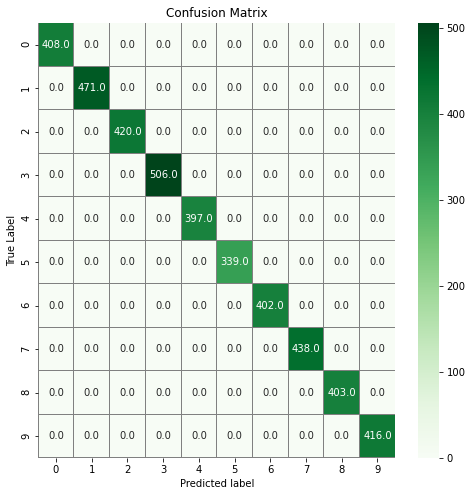

In [23]:
import seaborn as sns

## Predict the values from the validation dataset
y_pred = model.predict(test)

## Convert predictions classes to one hot vectors
y_pred_class = np.argmax(y_val, axis=1)

# Convert validation observations to one hot vectors
y_true = np.argmax(y_val, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_class)

# Plot the confusion matrix
f, ax = plt.subplots(figsize=(8,8))

sns.heatmap(confusion_mtx, annot=True, linewidths = 0.01, cmap='Greens', linecolor='gray', fmt='.1f', ax=ax)

plt.xlabel('Predicted label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()